## CORDIS "Energy Community related"  Projects Deterministic Search

the source code partialy inspired by an opensource code provided in https://github.com/MaastrichtU-IDS/clean-technologies-nlp.git

In [1]:
""" 
Installing a flashtext library for keyword search, if needed
""" 
#pip install flashtext

' \nInstalling a flashtext library for keyword search, if needed\n'

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

### 1. Gathering the terms catalogue

Importing a terms for preliminary filtering of the topics.

The term_catalogue involves the keywords praliminary filtering of energy projects aimed at implementation in communities.

It was made to limit the length of future corpus. (NOTE: it's element of subjctive interpretative exercise, must be explained

The generic logic presented as query:

- ('energy' AND ('communit*', positive', OR 'district*' OR 'neighbo?rhood*' OR 'building*') OR ('energy' AND ('consummption' OR 'demand') OR ('positive' AND 'carbon', 'climate'

- and additionaly the specific abbreviations and terms were incuded from the literature review, such as: 'NED', 'PED', 'ZED', 'ZEB', 'ZEDs', 'ZEBs', as well as 'social innovation'

In [2]:
categories = pd.read_excel('../data/terms_catalogue_query.xls')
categories = categories.fillna(method='ffill')
categories.columns = ['keywords']

primary_keyword = ['energy']
keywords_catalogue = list(categories['keywords'])
print(keywords_catalogue)

['urban', 'smart', 'community', 'communities', 'buildings', 'building', 'neighborhood', 'neighborhoods', 'district', 'districts', 'neighbourhood', 'neighbourhoods', 'city', 'cities', 'living lab', 'living labs', 'housing', 'social innovation', 'carbon positive', 'net-zero', 'net zero', 'carbon zero', 'energy demand', 'energy consumption', 'positive', 'climate', 'zen', 'ped', 'zebs', 'nzebs', 'zeb', 'nzeb', 'zeds', 'nzeds']


### Read CORDIS projects

cordis project available in *.csv and *.xlsx at https://data.europa.eu/data/datasets/cordish2020projects?locale=en

We import a CORDIS projects

In [3]:
cordish2020 = pd.read_csv( '../data/cordis-h2020projects-csv/project.csv', sep=';',error_bad_lines=False)
categories = pd.read_excel('../data/terms_catalogue_query.xls')
categories = categories.fillna(method='ffill')
categories.columns = ['keywords']

print(keywords_catalogue)

['urban', 'smart', 'community', 'communities', 'buildings', 'building', 'neighborhood', 'neighborhoods', 'district', 'districts', 'neighbourhood', 'neighbourhoods', 'city', 'cities', 'living lab', 'living labs', 'housing', 'social innovation', 'carbon positive', 'net-zero', 'net zero', 'carbon zero', 'energy demand', 'energy consumption', 'positive', 'climate', 'zen', 'ped', 'zebs', 'nzebs', 'zeb', 'nzeb', 'zeds', 'nzeds']


Take some an initial transformation of data in specific DataFrame, such as change of decimal ceparator for numerical values 'totalCost' and 'ecMaxContribution', and transform 'startDate' and 'endDate'  to datetime format (datetime64)

In [4]:
cordish2020['totalCost'] = [float(str(i).replace(',', '.')) for i in cordish2020['totalCost']]
cordish2020['ecMaxContribution'] = [float(str(i).replace(',', '.')) for i in cordish2020['ecMaxContribution']]
cordish2020['objective'] = [str(i) for i in cordish2020['objective']]
cordish2020['startDate'] = cordish2020['startDate'].map(pd.Timestamp)
cordish2020['endDate'] = cordish2020['endDate'].map(pd.Timestamp)

Checking of the available columns and elements in DataFrame output

In [5]:
cordish2020.columns

Index(['id', 'acronym', 'status', 'title', 'startDate', 'endDate', 'totalCost',
       'ecMaxContribution', 'legalBasis', 'topics', 'ecSignatureDate',
       'frameworkProgramme', 'masterCall', 'subCall', 'fundingScheme',
       'nature', 'objective', 'contentUpdateDate', 'rcn'],
      dtype='object')

In [6]:
cordish2020.head(5)

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn
0,813360,4D_REEF,SIGNED,"Past, present and future of turbid reefs in th...",2019-09-01,2023-08-31,4039155.72,4039155.72,H2020-EU.1.3.,MSCA-ITN-2018,2019-05-06,H2020,H2020-MSCA-ITN-2018,H2020-MSCA-ITN-2018,MSCA-ITN-ETN,NaN,Coral reefs are the economically most highly v...,2021-11-16 10:01:02,223180
1,754589,ATLASplus,SIGNED,Advanced Structural Integrity Assessment Tools...,2017-06-01,2021-11-30,7195162.59,3930863.92,H2020-Euratom,NFRP-1,2017-05-19,H2020,NFRP-2016-2017,NFRP-2016-2017-1,RIA,NaN,NFRP 1: 2016-2017 notes that “A number of curr...,2021-11-18 17:26:33,210827
2,851725,DONNI,SIGNED,Developmental Origins: exploring the Nature-Nu...,2020-09-01,2025-08-31,1498767.00,1498767.00,NaN,ERC-2019-STG,NaN,H2020,NaN,ERC-2019-STG,ERC-STG,NaN,The “Developmental Origins of Health and Disea...,2019-10-09 10:14:23,225458
3,725042,SEAL,SIGNED,Sound and Early Assessment of Leakage for Embe...,2017-09-01,2023-08-31,1946995.00,1946995.00,NaN,ERC-2016-COG,NaN,H2020,NaN,ERC-2016-COG,ERC-COG,NaN,"Side channel attacks use, alongside informatio...",2019-11-27 12:35:55,209920
4,818859,TechChange,SIGNED,"Technological Change: New Sources, Consequence...",2019-05-01,2024-04-30,1268900.00,1268900.00,NaN,ERC-2018-COG,NaN,H2020,NaN,ERC-2018-COG,ERC-COG,NaN,Technological change in information technology...,2020-08-07 14:17:01,220884


Total number of imported projects from CORDIS database

In [7]:
len(cordish2020)

35325

In [8]:
cordish2020.loc[17]['objective'] # test the objective output

'We have created a high performance, ultra-light and ultra strong carbon nanotube (CNT) film electrical heaters. Compared to traditional heating materials, they are super fast (reach the terminal temperature in less than (1/4s), lighter (100x), resistant to corrosion (concentrated acids do not affect them) and cheaper (a fraction of the cost). The heaters are fully scalable from nano-sized devices to full size applications on commercial aircrafts. Previous experiments involved a range of material sizes, from transformations on a molecular level to rapid de-icing of a model aircraft . The performance of the heaters revealed a12,000,000% advantage by weight over the current most common heating alternative: resistive wires made of nickelchromiumalloy. In this proposal, we show how this invention could alleviate the problem of aircraft de-icing.'

### 3. Text KeyWord SEARCHING

The goal is to make a preliminary broad filtering of the projects by title

In [9]:
from flashtext import KeywordProcessor

Function that will produce as output a list(aka column vector) of mathed items from terms catalogue by means of KeywordProcessor()

In [10]:
def extract(vec, dictionary, info=False):
    empty = []
    for line in vec:
        empty.append(dictionary.extract_keywords(line, span_info=info))
    return empty

The two blocks below aimed to take a spacified term_cataloge as a *dictionary*, and with a help of flashtext KeywordProcessor() we itarative the project objective and title columns by passing the arguments to our specified function extract() where each cell in respective column iterated on particular matches with the *dictionary* and returned as array of mathed terms.

**First layer - Primary filtraion by "energy" in title and objective**

In [11]:
dictionary1 = KeywordProcessor()
dictionary1.add_keywords_from_list(primary_keyword)
extracted1 = extract(cordish2020['objective'], dictionary1)
cordish2020['energy_in_obj'] = [list(set(i)) if len(i)>0 else '' for i in extracted1]
cordish2020['count_energy_in_obj'] = [len(i) for i in extracted1]

extracted2 = extract(cordish2020['title'], dictionary1)
cordish2020['energy_in_title'] = [list(set(i)) if len(i)>0 else '' for i in extracted2]
cordish2020['count_energy_in_title'] = [len(i) for i in extracted2]


In [12]:
cordish2020matches = cordish2020[(cordish2020['count_energy_in_obj'] > 0 ) | (cordish2020['count_energy_in_title'] > 0 )  ] 

In [13]:
len(cordish2020matches)

6020

**Second layer - secondary filtrarion by keywords**

In [14]:
dictionary2 = KeywordProcessor()
dictionary2.add_keywords_from_list(keywords_catalogue)
extracted2 = extract(cordish2020matches['objective'], dictionary2)
cordish2020matches['matches_keywords_in_objective'] = [list(set(i)) if len(i)>0 else '' for i in extracted2]
cordish2020matches['count_matches_keywords_in_objective'] = [len(i) for i in extracted2]
#cordish2020['count_unique_term_in_title'] = [len(set(i)) for i in extracted2]
cordish2020matches['count_keywords_mathes']= [len(row) for index,row in cordish2020matches['matches_keywords_in_objective'].iteritems()]

In [15]:
cordish2020matches['durationM'] = ((cordish2020matches['endDate'] - cordish2020matches['startDate'])/np.timedelta64(1, 'M')).round(0)

In [16]:
cordish2020matches_filtered=cordish2020matches[(cordish2020matches['count_keywords_mathes'] > 1 )] 

In [17]:
cordish2020matches_filtered[['acronym', 'title','id','objective', 'startDate','endDate', 'status','ecMaxContribution', 'totalCost',
                    'durationM', 'energy_in_obj', 'count_energy_in_obj', 'energy_in_title','matches_keywords_in_objective','count_keywords_mathes' ]].head(5)

,acronym,title,id,objective,startDate,endDate,status,ecMaxContribution,totalCost,durationM,energy_in_obj,count_energy_in_obj,energy_in_title,matches_keywords_in_objective,count_keywords_mathes
58,MiniStor,Minimal Size Thermal and Electrical Energy Sto...,869821,The EU building stock has large potential to i...,2019-11-01,2024-04-30,SIGNED,7537745.07,8532202.24,54.0,[energy],8,[energy],"[smart, buildings, building, energy consumption]",4
62,TETRAMAX,TEchnology TRAnsfer via Multinational Applicat...,761349,The major objective of TETRAMAX is to provide ...,2017-09-01,2021-12-31,SIGNED,6997273.75,7196131.73,52.0,[energy],2,,"[building, smart]",2
135,NATCONSUMERS,NATural Language Energy for Promoting CONSUMER...,657672,Residential energy consumption represents the ...,2015-05-01,2017-06-30,CLOSED,2032528.75,2048278.75,26.0,[energy],10,[energy],"[buildings, communities, energy consumption]",3
228,EOLI FPS,Roof top wind turbine for urban areas,816706,High electricity prices and the lowering costs...,2018-05-01,2018-08-31,CLOSED,50000.00,71429.00,4.0,[energy],8,,"[urban, buildings, nzeb, energy consumption]",4
325,mySMARTLife,Smart Transition of EU cities towards a new co...,731297,mySMARTLife project aims at the development of...,2016-12-01,2021-11-30,SIGNED,18656102.41,21191771.50,60.0,[energy],1,,"[smart, cities, climate, city, urban]",5


In [18]:
len(cordish2020matches_filtered)

1229

**Write a results into the .csv file**

In [19]:
results_keywordSearch=cordish2020matches_filtered[['acronym', 'title','id', 'objective', 'startDate','endDate',  
                                                   'durationM', 'status','ecMaxContribution', 'totalCost',
                    'energy_in_obj', 'energy_in_title','count_keywords_mathes' ]]
results_keywordSearch.to_csv('../data/resultsCORDIS_keywordSearch_18.02.csv')

We put a matches into the separate column:

In [20]:
%store results_keywordSearch

Stored 'results_keywordSearch' (DataFrame)


### 4. Building list of terms

Install and import additional libraries for NLP and englih stopwords 

In [21]:
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oleksandr.husiev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oleksandr.husiev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

Specifying the list of stop_words and additional_stopwords

In [22]:
import csv
with open('../data/additional_stopwords.csv', 'r',  encoding="latin1") as f:
    reader = csv.reader(f)
    noizy_words_for_additional_stopwords = list (reader)
additional_stopwords = [item for sublist in noizy_words_for_additional_stopwords for item in sublist]
sw = stopwords.words("english")+additional_stopwords
print (sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Tokenization Function (with Stemming/Lemanization)**

This is the vertion of tokenizer that takes either Series type or string by checking iF statement with `isinstance()`, boolean request for stemmer and an array of a stop words, and produce as output the list of all tokens (i.e. words from the whole column processed as single string) at the same time removing too short tokens with less than 1 character.

In [36]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
porter_stemmer=PorterStemmer()

#Lemanisation option
"""from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()"""

def only_tokenizer(series, stemmer=True, stop_words=[]):
    tokenized_list=[]
    if isinstance(series, pd.Series):
        text=series.str.cat(sep=' ')
    else:
        text=series

    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags

    text=re.sub(r"""['’"`«»]""", '', text)
    text=re.sub(r"""([0-9])([\u0400-\u04FF]|[A-z])""", r"\1 \2", text)
    text=re.sub(r"""([\u0400-\u04FF]|[A-z])([0-9])""", r"\1 \2", text)
    text=re.sub(r"""[\-–.,!:+*/_]""", ' ', text)

    for word in word_tokenize(text):
        if word.isalpha():
            word=word.lower()
        else:
            continue
        
        #if stemmer is True:
            #word=porter_stemmer.stem(word)
        if lemmatizer is True:
            word=lemmatizer(word)
        if word not in stop_words and len(word)>1:     
            tokenized_list.append(word)
    return tokenized_list

#### Tokenization

ONLY Tokenize content of each cell in ['objective'] and put it bain it to corresponding cell ['objective_tokenized']

In [37]:
results_keywordSearch['objective_tokenized'] = [only_tokenizer(i, True, sw) for i in results_keywordSearch['objective']]

Checking tokenizer output

In [38]:
print (results_keywordSearch['objective'][58])
print ('\n')
print ('Title of the project: ', results_keywordSearch['title'][58])
print ('\n')
print (results_keywordSearch['objective_tokenized'][58])

The EU building stock has large potential to increase its energy efficiency with solutions that can be integrated to existing dwellings and through different measures. One of them is optimizing the use and management of thermal energy by allowing it to be stored, levelling demand peaks and increasing use of renewables affected by intermittency such as solar-based heating. The MiniStor project aims at designing and producing a novel compact integrated thermal storage system for achieving sustainable heating, cooling and electricity storage that can be adapted to existing systems in residential buildings. It is based on a high-performing CaCl2/NH3 (calcium chloride/ammonia) thermochemical material reaction combined with parallel hot and cold phase-change materials for flexibility and usage year-round. It also stores electrical energy in a Li-ion battery that responds to grid signals and can sell to the electrical grid. The system is managed by a smart Building Energy Management System th

### Creation of ngrams

**Ngrams function**

The next block aimed to generate a ngrams (contiguous sequence of n items from a given sample of text) for selecter projects from keyword earch. The primary uni-, bi- and tri- grams are going to be created for a tokens of DataFrame

Ngrams created from pandas Dataframe in a single line of code, generated by means of nltk.ngrams and presented as bar charts. ngrams
We create objective_words applying only_tokenizer to have just a list of all terms as one dimentional list of corpus

#### 1ngram 
Thus, for unigrams (i.e. single words) we have in a sample of *tokens* out of *total umber*, of which *unique* tokens (after applying  stemmer) are unique. And the share of the 20 most used tokens is about 11% of all tokens available in the dataset.

In [39]:
objective_words = only_tokenizer(results_keywordSearch['objective'], True, sw)
print('Length of the objective_words list: {}'. format(len (objective_words)))
objective_words_unique=[]
for word in objective_words:
    if word not in objective_words_unique:
        objective_words_unique.append(word)
print('Length of the objective_words_unique list: {}'. format(len(objective_words_unique)))

Length of the objective_words list: 212996
Length of the objective_words_unique list: 15166


In one line of code, we can find out which **ngram** occur the most in this particular sample.

In [40]:
unigrams_series = (pd.Series(nltk.ngrams(objective_words, 1)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

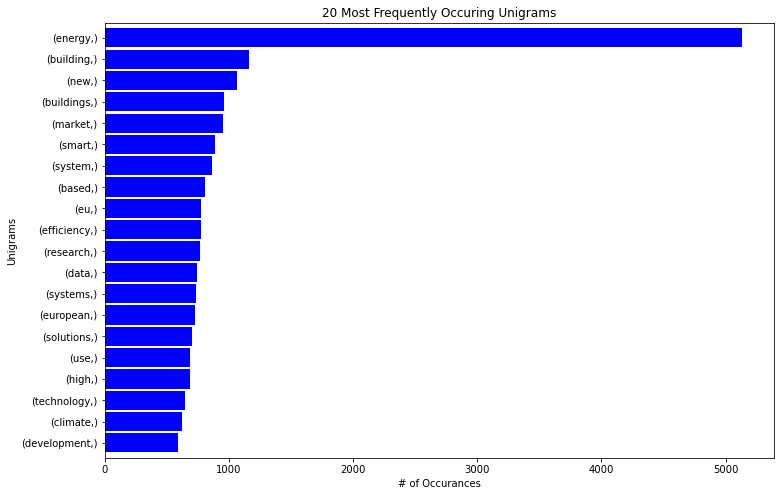

In [41]:
unigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Unigrams')
plt.ylabel('Unigrams')
plt.xlabel('# of Occurances')

**2ngrams plot**

In [30]:
bigrams_series = (pd.Series(nltk.ngrams(objective_words, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

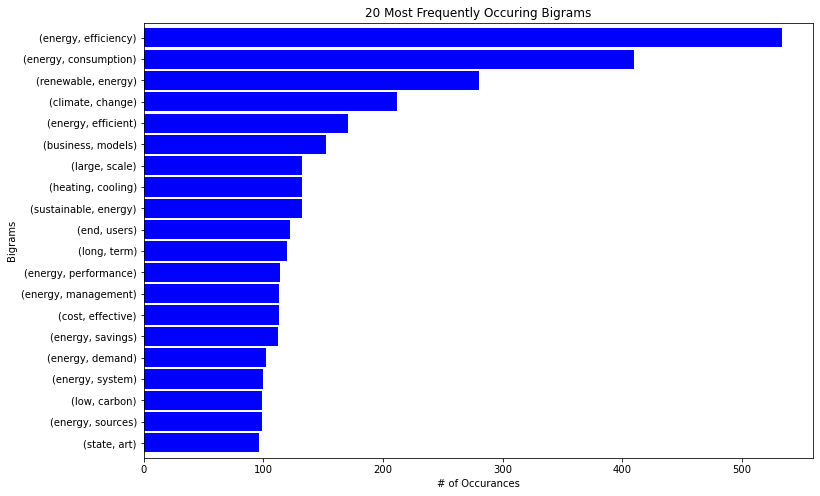

In [31]:
bigrams_series.sort_values().plot.barh (color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigrams')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

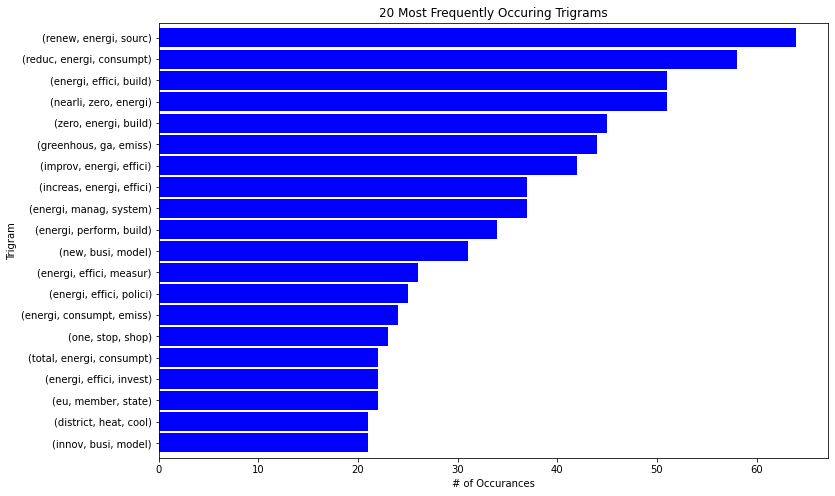

In [32]:
trigrams_series = (pd.Series(nltk.ngrams(objective_words, 3)).value_counts())[:20]
trigrams_series.sort_values().plot.barh (color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

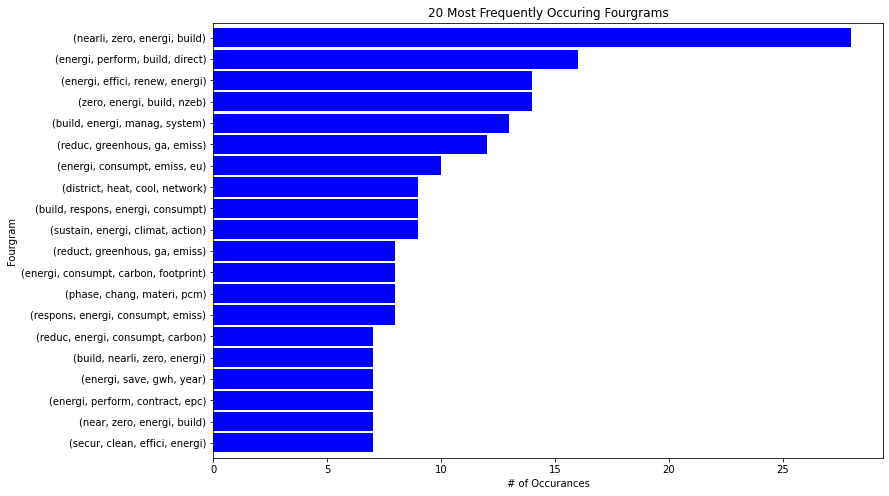

In [33]:
fourgrams_series = (pd.Series(nltk.ngrams(objective_words, 4)).value_counts())[:20]
fourgrams_series.sort_values().plot.barh (color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('# of Occurances')

Let's look at total number of tokens (i.e. terms) and unique tokens in form of uni- bi- tri - grams in one place

In [34]:
objective_ngrams1=pd.Series(nltk.ngrams(objective_words, 1))
print ('Whole terms 1ngrams terms: ', len(objective_ngrams1))
objective_ngrams1=objective_ngrams1.unique()# leave only unique
print ('Unique 1ngrams terms: ', len(objective_ngrams1))

objective_ngrams2=pd.Series(nltk.ngrams(objective_words, 2))
print ('\nWhole terms 2ngrams terms: ', len(objective_ngrams2))
objective_ngrams2=objective_ngrams2.unique()# leave only unique
print ('Unique  2ngrams terms: ', len(objective_ngrams2))

objective_ngrams3=pd.Series(nltk.ngrams(objective_words, 3))
print ('\nWhole terms 3ngrams terms: ', len(objective_ngrams3))
objective_ngrams3=objective_ngrams3.unique() # leave only unique
print ('Unique 3ngrams terms: ', len(objective_ngrams3))

Whole terms 1ngrams terms:  211730
Unique 1ngrams terms:  9626

Whole terms 2ngrams terms:  211729
Unique  2ngrams terms:  139133

Whole terms 3ngrams terms:  211728
Unique 3ngrams terms:  199793


The number of ngrams for selected corpus is volumious. After all, the amount of unique unigrams is 8837 which grows in geometric progression for bi- and tri- grams.

The *bigrams and trigrams terms considered to be the most adequate for specification of the following classificator*, since the unigrams missing the neighbour word to understand the context, while 4grams provide the set of terms that are useful to understand but it doesn't give additional distinguishing of categories (while the number of combinations increased dramatically).

It is clear that: 
1. This distribution doesn't give a picture and opportunity to generalize the methods, approaches, solution.
2. The term frequency processing must be done.
3. The list of stop words must be contributed to eliminate the words that still don't have a meaning
4. The bigrams and trigrams would be considered as best combinations for specification of terms and categories.

Export of top terms (i.e. Term frequency in ascending order) into the csv file for manual screaning and classification preparation

In [35]:
bigr=pd.Series(nltk.ngrams(objective_words, 1)).value_counts()#[:1000] #example with bigrams
df_bigram = pd.DataFrame(index=bigr.index, data=bigr)
df_bigram.to_csv('../data/ngrams/unigrams_v1.3.csv')

### Term frequency distribution

As the whole sample frequency distrition described below doen't give a picture, the term frequency distribution will be created for each project as following:

| index            | word0       | word1            | word2               |      ...                          |
| ---------------  | ----------- | ---------------- | ------------------- | --------------------------------- |
| project index[n] | 1           | 0                | 2                   |      ...                          |
|  ...             | ...         | ...              | ...                 |      ...                          |

After that created Dataframe will be transposed and the frequency sum of each term will be presented as separate column 

| index            | proj index[n]       |  proj index[n]   |    proj index[n]    |      ...          | SUM   |
| ---------------  | ------------------- | ---------------- | ------------------- | ----------------- | ------|
|  word0           | ...                 | ...              | ...                 |      ...          |       |
|  word1           | ...                 | ...              | ...                 |      ...          |       |
|  word2           | ...                 | ...              | ...                 |      ...          |       |
|  ...             | ...                 | ...              | ...                 |      ...          |       |


The bag of words frequency would be look like that:

We need to create terms frequency table with a data for words and their correcponding frequency

In [36]:
print ('Type of objective_ngrams1: ', type(objective_ngrams1))
#print ('Length of the objective_ngrams1 u 'len (objective_ngrams1)
print ('Type of objective_ngrams1 element: ', type(objective_ngrams1[0]))

Type of objective_ngrams1:  <class 'numpy.ndarray'>
Type of objective_ngrams1 element:  <class 'tuple'>


#### Term frequency and TF-IDF by *Sklearn* library, using *CountVectorizer()* and *TfidfVectorizer()* 

In [37]:
#pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer

For creation of abovementioned table of term frequency and TF-IDF, we will put the data into the list, which will hold the token of each of our project, being a list of the lists.

In [44]:
objective_terms_tokenized =[]
for j in results_keywordSearch['objective_tokenized']:
    objective_terms_tokenized.append(str(j))

In [39]:
print (type( objective_terms_tokenized))

<class 'list'>


The Term frequency would be presented by the next three blocks for uni- bi- and tri- grams.

The list of the lists of terms (of our tokenized objective) will be processed by CountVectorizer(), to generate a vectors of the words (i.e. terms) than the words mane will be assigned as DataFrame.column, matrix of words vector will be assigned as DataFtame.data, and indexes will be assigned from the our results_keywordSearch.index.

The second step is gonna be transponding of our DataFrame and creation of term_freq column that will sum the frequencies of the term in each particular project.

**Unigrams term frequency**

In [40]:
BOW_unigram_vectorizer = CountVectorizer()

BOW_matrix_unigram = BOW_unigram_vectorizer.fit_transform(objective_terms_tokenized)
BOW_terms_unigram=BOW_unigram_vectorizer.get_feature_names()
BOW_unigram_freq = BOW_matrix_unigram.toarray()

In [41]:
df_BOW_unigram = pd.DataFrame(index=results_keywordSearch.index, data=BOW_unigram_freq,columns = BOW_terms_unigram)
df_BOW_unigram.head(5)

,abreast,abridg,abrupt,abundantli,academ,academi,academia,acceler,acceleromet,accelwat,...,öamtc,żurawlów,ʽdi,ʽresourc,ʽsoftwarizationʼ,ιτ,μm,μmole,σiderwin,τo
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_BOW_unigram_transp = df_BOW_unigram.T

df_BOW_unigram_transp['term_treq'] = df_BOW_unigram_transp.sum(axis=1)
term_unigram_freq = df_BOW_unigram_transp[['term_treq']]
term_unigram_freq = term_unigram_freq[term_unigram_freq['term_treq']>5]
term_unigram_freq=term_unigram_freq.sort_values(by=['term_treq'], ascending=False)
term_unigram_freq

,term_treq
energi,5163
build,2291
develop,1895
system,1629
technolog,1407
...,...
fifteen,6
feutur,6
ramp,6
tough,6


Save the list of terms *unigrams* as a csv file

In [43]:
unigram = pd.DataFrame(index=term_unigram_freq.index, data=term_unigram_freq)
unigram.to_csv('../data/ngrams/unigrams.csv')

**Bigrams term frequency**

In [44]:
BOW_bigram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))

BOW_matrix_bigram = BOW_bigram_vectorizer.fit_transform(objective_terms_tokenized)
BOW_terms_bigram=BOW_bigram_vectorizer.get_feature_names()

terms_bigram_freq = BOW_matrix_bigram.toarray()

In [45]:
df_BOW_bigram = pd.DataFrame(index=results_keywordSearch.index, data=terms_bigram_freq,columns = BOW_terms_bigram)
df_BOW_bigram.head(5)

,abreast research,abridg eu,abrupt transit,abundantli dure,academ advisor,academ appli,academ background,academ boundari,academ center,academ circl,...,żurawlów similar,żurawlów villag,ʽdi aggreg,ʽresourc disaggregationʼ,ʽsoftwarizationʼ migrat,ιτ celj,μm formul,μmole prototyp,σiderwin propos,τo address
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We store particular dataframe to access it from another Jupyter Notebook

In [46]:
%store df_BOW_bigram

Stored 'df_BOW_bigram' (DataFrame)


In [47]:
df_BOW_bigram_transp = df_BOW_bigram.T

df_BOW_bigram_transp['term_treq'] = df_BOW_bigram_transp.sum(axis=1)
term_bigram_freq = df_BOW_bigram_transp[['term_treq']]
term_bigram_freq = term_bigram_freq[term_bigram_freq['term_treq']>1]
term_bigram_freq=term_bigram_freq.sort_values(by=['term_treq'], ascending=False)
term_bigram_freq

,term_treq
energi effici,705
energi consumpt,415
renew energi,301
climat chang,216
busi model,205
...,...
host physiolog,2
host interact,2
host fixat,2
host fellow,2


Save the list of terms *bigrams* as a csv file

In [48]:
bigrams = pd.DataFrame(index=term_bigram_freq.index, data=term_bigram_freq)
bigrams.to_csv('../data/ngrams/bigrams.csv')

**Trigrams term frequency**

In [49]:
BOW_trigram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(3, 3))

BOW_matrix_trigram = BOW_trigram_vectorizer.fit_transform(objective_terms_tokenized)
BOW_terms_trigram=BOW_trigram_vectorizer.get_feature_names()

terms_trigram_freq = BOW_matrix_trigram.toarray()

In [50]:
df_BOW_trigram = pd.DataFrame(index=results_keywordSearch.index, data=terms_trigram_freq,columns = BOW_terms_trigram)
df_BOW_trigram.head(5)

,abreast research special,abridg eu usa,abrupt transit tip,abundantli dure summer,academ advisor four,academ appli research,academ background fibr,academ boundari object,academ center cover,academ circl cheetah,...,żurawlów similar anti,żurawlów villag eastern,ʽdi aggreg ranʼ,ʽresourc disaggregationʼ allow,ʽsoftwarizationʼ migrat convent,ιτ celj si,μm formul solder,μmole prototyp contain,σiderwin propos develop,τo address limit
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_BOW_trigram_transp = df_BOW_trigram.T

df_BOW_trigram_transp['term_treq'] = df_BOW_trigram_transp.sum(axis=1)

term_trigram_freq = df_BOW_trigram_transp[['term_treq']]
term_trigram_freq = term_trigram_freq[term_trigram_freq['term_treq']>1]
term_trigram_freq=term_trigram_freq.sort_values(by=['term_treq'], ascending=False)
term_trigram_freq

,term_treq
renew energi sourc,64
reduc energi consumpt,58
energi effici build,51
nearli zero energi,51
zero energi build,45
...,...
european smart citi,2
european road transport,2
european research innov,2
european polici strateg,2


Save the list of terms *trigrams* as a csv file

In [52]:
trigram = pd.DataFrame(index=term_trigram_freq.index, data=term_trigram_freq)
trigram.to_csv('../data/ngrams/trigrams.csv')

**Save the list of terms_name as a csv file**

### Terms Frequency - Inverse Document Frequency (TF-IDF)

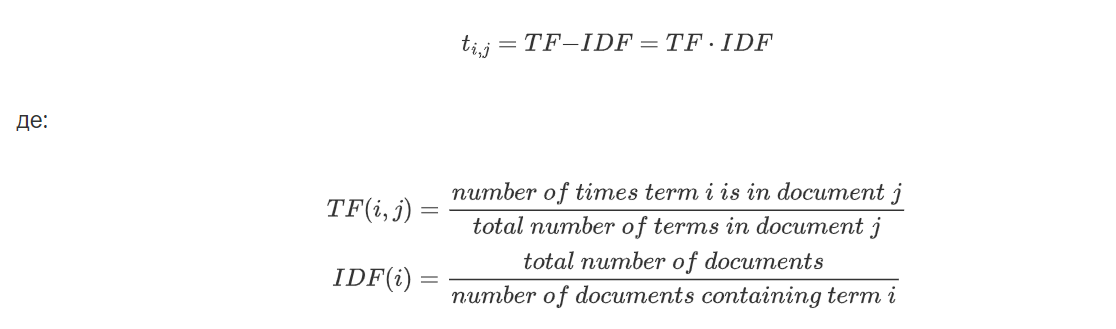

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

**TF-IDF Unigrams**

In [45]:
tfidf_unigram_vectorizer = TfidfVectorizer(ngram_range=(1,1))

tfidf_unigram = tfidf_unigram_vectorizer.fit_transform(objective_terms_tokenized)
tfidf_terms_name_unigram = tfidf_unigram_vectorizer.get_feature_names()
tfidf_unigram_matrix = tfidf_unigram.toarray()
print (tfidf_terms_name_unigram[:5])
tfidf_unigram = pd.DataFrame(index=results_keywordSearch.index, data=tfidf_unigram_matrix,columns = tfidf_terms_name_unigram)
tfidf_unigram.head()

['aarhus', 'abacus', 'abandoned', 'abatement', 'abides']


,aarhus,abacus,abandoned,abatement,abides,abilities,ability,able,ably,abnormal,...,öamtc,żurawlów,ʽdis,ʽresource,ʽsoftwarizationʼ,ιτ,μm,μmole,σiderwin,τo
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
tfidf_unigram_transp = tfidf_unigram.T
tfidf_unigram_transp.head(5)
tfidf_unigram_transp['tf-idf'] = tfidf_unigram_transp.sum(axis=1)

tfidf_unigram_term_freq = tfidf_unigram_transp[['tf-idf']]
tfidf_unigram_term_freq = tfidf_unigram_term_freq[tfidf_unigram_term_freq['tf-idf']>0.1]
tfidf_unigram_term_freq=tfidf_unigram_term_freq.sort_values(by=['tf-idf'], ascending=False)
tfidf_unigram_term_freq

,tf-idf
energy,71.662423
building,28.350076
buildings,27.887554
smart,25.168391
market,24.775379
...,...
stratego,0.100080
brunswick,0.100080
authorization,0.100080
hre,0.100080


**As we can see we still have words that were tokenized and put as ngram being unessential for our purpose. Mainly , they are the acronyms of projects that were mentioned in project description and different proper nouns (cities, countries, etc).**

For that reason the manual screning of TFIDF terms will be done to repove "noizy" to words that were tokenized as unigrams by putting them into the additional stopwords.

In [47]:
tfidf_unigram=tfidf_unigram_term_freq[:1000] #example with bigrams
tfidf_unigram.to_csv('../data/ngrams/unigrams_tfidf.csv')

**TF-IDF Bigrams**

In [48]:
tfidf_bigram_vectorizer = TfidfVectorizer(ngram_range=(2,2))

tfidf_bigram = tfidf_bigram_vectorizer.fit_transform(objective_terms_tokenized)
tfidf_terms_name_bigram = tfidf_bigram_vectorizer.get_feature_names()
tfidf_bigram_matrix = tfidf_bigram.toarray()

print (tfidf_terms_name_bigram[:5])
tfidf_bigram = pd.DataFrame(index=results_keywordSearch.index, data=tfidf_bigram_matrix,columns = tfidf_terms_name_bigram)
tfidf_bigram.head()

['aarhus prague', 'abacus innovative', 'abandoned village', 'abatement mediterranean', 'abides geoss']


,aarhus prague,abacus innovative,abandoned village,abatement mediterranean,abides geoss,abilities communicate,abilities environmental,abilities platform,ability adopt,ability analyse,...,żurawlów similar,żurawlów village,ʽdis aggregated,ʽresource disaggregationʼ,ʽsoftwarizationʼ migrating,ιτ celje,μm formulate,μmole prototype,σiderwin proposes,τo address
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
tfidf_bigram_transp = tfidf_bigram.T

tfidf_bigram_transp['tf-idf'] = tfidf_bigram_transp.sum(axis=1)

tfidf_bigram_term_freq = tfidf_bigram_transp[['tf-idf']]
tfidf_bigram_term_freq=tfidf_bigram_term_freq[tfidf_bigram_term_freq['tf-idf']>0.01]
tfidf_bigram_term_freq

,tf-idf
aarhus prague,0.064192
abacus innovative,0.073524
abandoned village,0.079354
abatement mediterranean,0.070596
abides geoss,0.070450
...,...
ιτ celje,0.077563
μm formulate,0.074068
μmole prototype,0.074042
σiderwin proposes,0.079298


After that, we save obtained DataFrame it as .csv file, sorted in ascending order by tf-idf column in the following block of code. The same block will be executed for TF-IDF Trigrams.

In [50]:
tfidf_bigram=tfidf_bigram_term_freq.sort_values(by=['tf-idf'], ascending=False)
tfidf_bigram=tfidf_bigram[:1000] #example with bigrams
tfidf_bigram = pd.DataFrame(index=tfidf_bigram.index, data=tfidf_bigram)
tfidf_bigram.to_csv('../data/ngrams/bigrams_tfidf.csv')

**TF-IDF Trigrams**

In [60]:
tfidf_trigram_vectorizer = TfidfVectorizer(ngram_range=(3,3))

tfidf_trigram = tfidf_trigram_vectorizer.fit_transform(objective_terms_tokenized)
tfidf_terms_name_trigram = tfidf_trigram_vectorizer.get_feature_names()
tfidf_trigram_matrix = tfidf_trigram.toarray()
tfidf_trigram = pd.DataFrame(index=results_keywordSearch.index, data=tfidf_trigram_matrix,columns = tfidf_terms_name_trigram)

In [61]:
tfidf_trigram_transp = tfidf_trigram.T

tfidf_trigram_transp['tf-idf'] = tfidf_trigram_transp.sum(axis=1)

tfidf_trigram_term_freq = tfidf_trigram_transp[['tf-idf']]
tfidf_trigram_term_freq = tfidf_trigram_term_freq[tfidf_trigram_term_freq['tf-idf']>0.1]
tfidf_trigram_term_freq.sort_values(by=['tf-idf'], ascending=False)

,tf-idf
renew energi sourc,2.697478
reduc energi consumpt,2.465855
nearli zero energi,2.335226
energi effici build,2.291328
zero energi build,2.093285
...,...
learn algorithm develop,0.100920
hous optmis solut,0.100920
develop compani base,0.100920
regard employ peopl,0.100920


Block of code which saves TF-IDF Trigrams as .csv 

In [62]:
tfidf_trigram=tfidf_trigram_term_freq.sort_values(by=['tf-idf'], ascending=False)
tfidf_trigram=tfidf_trigram[:1000] #example with bigrams
tfidf_trigram = pd.DataFrame(index=tfidf_trigram.index, data=tfidf_trigram)
tfidf_trigram.to_csv('../data/ngrams/trigrams_tfidf.csv')

### Status of projects

In [63]:
time_plot = results_keywordSearch[['id','acronym','title', 'objective', 'status', 'startDate','endDate','ecMaxContribution']]

closed = len(time_plot.loc[time_plot['status'] == 'CLOSED'])
signed = len(time_plot.loc[time_plot['status'] == 'SIGNED'])
terminated = len(time_plot.loc[time_plot['status'] == 'TERMINATED'])
sum= closed+signed+terminated
print('Closed projects: {}\nSigned projects: {} \nTerminated: {} \nTOTAL: {}'.format(closed, signed, terminated, sum))


Closed projects: 486
Signed projects: 730 
Terminated: 13 
TOTAL: 1229
